importing some important lib

In [53]:
import tensorflow as tf
import mitdeeplearning as mld
import numpy as np
import matplotlib.pyplot as plt


In [39]:
sport=tf.constant("Tennis",tf.string)
number=tf.constant(1.234345343,tf.float64)
print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy))
print("`number`is a {}-d Tensor".format(tf.rank(number).numpy))

`sport` is a <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=0>>-d Tensor
`number`is a <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=0>>-d Tensor


vector and list can be used as 1-d tensor


In [40]:
sport1=tf.constant(["tennis","football"],tf.string)
number1=tf.constant([1.234444544,5.354457876,6.987868775765],tf.float32)
print("`sport1` is a {}-d Tensor".format(tf.rank(sport1).numpy))
print("`number1`is a {}-d Tensor".format(tf.rank(number1).numpy))


`sport1` is a <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=1>>-d Tensor
`number1`is a <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=1>>-d Tensor


In [41]:
matrix=tf.constant([[1,2,3],[1,2,3],[1,2,3]],tf.int64)
# print("`matrix`is a {}-d Tensor".format(tf.rank(matrix).numpy))
assert isinstance(matrix,tf.Tensor)
assert tf.rank(matrix).numpy()==2


In [42]:
# creating 4-D also known as rank-4 tensor
image=tf.zeros([10,256,256,3])
assert isinstance(image,tf.Tensor)
assert tf.rank(image).numpy()==4
assert tf.shape(image).numpy().tolist()==[10,256,256,3]


In [43]:
row_vector=matrix[1]
col_vector=matrix[:1]
scalar=matrix[0,1]
print("row_vector".format(row_vector.numpy()))
print("col_vector".format(col_vector.numpy()))
print("scalar".format(scalar.numpy()))
print(scalar)

row_vector
col_vector
scalar
tf.Tensor(2, shape=(), dtype=int64)


In [44]:
# compuation on Tensor
# crate the node and initialize values
a=tf.constant(12)
b=tf.constant(39)
c1=tf.add(a,b)
c2=a+b
print(c1)
print(c2)

tf.Tensor(51, shape=(), dtype=int32)
tf.Tensor(51, shape=(), dtype=int32)


In [45]:

def fun(a,b):
    c=tf.add(a,b)
    d=tf.subtract(b,1)
    e=tf.multiply(c,d)
    return e
e_out=fun(10,4)
print(e_out)

tf.Tensor(42, shape=(), dtype=int32)


In [46]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.math.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


Neural network in TensorFlow

In [57]:
# definign a network layer
# n_output_node->number of output nodes
# input_shape->shape of the input
# x->input to the layer
class OurDenseLayer(tf.keras.layers.Layer):
    def __init__(self,n_output_nodes):
      super(OurDenseLayer,self).__init__()
      self.n_output_nodes=n_output_nodes
    
    def build(self,input_shape):
       d=int(input_shape[-1])
    #define and initialize parameters: a weight matrix W and bias b
    # not that parameter initialization is random!    
       self.W=self.add_weight("weight",shape=[d, self.n_output_nodes])#note the dimensionality
       self.b=self.add_weight("bias",shape=[1,self.n_output_nodes])#note the dimensionality
    def call(self,x):
       z=tf.matmul(x,self.W)+self.b #(Wx+b)
       Y=tf.sigmoid(z) #Y_out=Sfxn(Wx+b)
       return Y
    
    # since layer parameters are intitialized randomly ,we will set a random seed for reproduciblity
tf.random.set_seed(1)
layer=OurDenseLayer(3)
layer.build((1,2))
x_input=tf.constant([[1,2.]],shape=(1,2))
Y=layer.call(x_input)
# test the output
print(Y.numpy())
mld.lab1.test_custom_dense_layer_output(Y)


[[0.95430094 0.1759124  0.05156917]]


AttributeError: module 'mitdeeplearning' has no attribute 'lab1'

In [65]:
# defining a neural network using the Sequential alo
# importing relevent packages
from keras import Sequential
from keras.layers import Dense

# defining the number of outputs
n_output_node=3

# first define the model
model=Sequential()
# dense layers are define by the parameter w and b!
dense_layer=Dense(n_output_node,activation='sigmoid') 
model.add(dense_layer)


In [66]:
# now testing the model with example input
x_input=tf.constant([[1,2.]],shape=(1,2))
model_output=model(x_input).numpy()
print(model_output)

[[0.6586842  0.82441765 0.7221868 ]]


In [69]:
# defining a model using subclassing
from tensorflow.keras import Model
from keras.layers import Dense

class SubclassModel(tf.keras.Model):
    # in _init_ we define the model's layer
    def __init__(self,n_output_nodes):
        super(SubclassModel,self).__init__()
        self.dense_layer=Dense(n_output_node,activation="sigmoid")
        # in the call function we define the model's forward pass
    def call(self,inputs):
        return self.dense_layer(inputs)    

In [70]:
# now test out subclasmodel
n_output_node=3
model=SubclassModel(n_output_node)
x_input=tf.constant([[1,2.]],shape=(1,2))
print(model.call(x_input))

tf.Tensor([[0.37674904 0.80793077 0.54068625]], shape=(1, 3), dtype=float32)


In [73]:
# defining a model using subclassing and specifying custom behavior
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
class IdentityModel(tf.keras.Model):
    def __init__(self,n_output_node):
        super(IdentityModel,self).__init__()
        self.dense_layer=Dense(n_output_node,activation="sigmoid")

    def call(self,input,isidentity=False):
        x=self.dense_layer(input)
        if isidentity:
            return input
        return x    

In [92]:
# lets check the behavior:
n_output_node=3
model=IdentityModel(n_output_node)
x_input=tf.constant([[1,2.0]],shape=(1,2))
out_activation=model.call(x_input)
out_identity=model.call(x_input,isidentity=True)
print("network output with activation:{}; network identity output:{}".format(out_activation.numpy(),out_identity.numpy()))

network output with activation:[[0.26714668 0.17264211 0.9068334 ]]; network identity output:[[1. 2.]]


# Automatic differentiation in tensorflow

In [101]:
# gradient computation with gradientTape
# y=x^2
x=tf.Variable(3.0)
with tf.GradientTape() as tape:
    y=x**2
    tape.watch(x)
dy_dx=tape.gradient(y,x)
print(dy_dx.numpy())



6.0


init x=[[-0.92759573]]
this is max loss-- [24.281199]
this is min loss [2.420144e-06]


Text(0, 0.5, 'x-value')

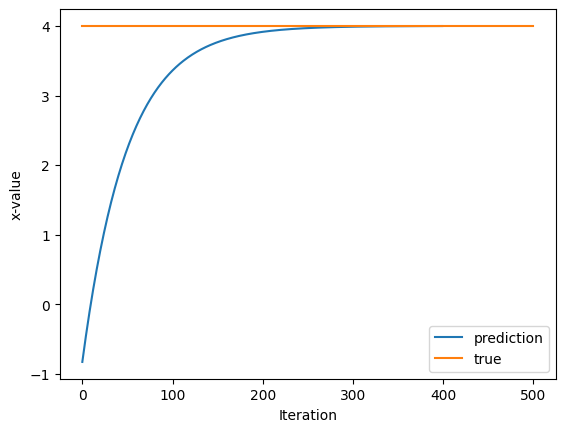

In [115]:
# function minmize the loss func
# initi the variabel 
x=tf.Variable([tf.random.normal([1])])
print("init x={}".format(x.numpy()))
learning_rate=1e-2 #learning rate for SGD
history=[]
losses=[]
# define the target vaue
x_f=4
# now we will run SGD for a number if iteratins.at each iteration we comput the loss,
# compte the deruvative of the loss with repect to x,and perform the SGD update.
for i in range(400):
    with tf.GradientTape() as tape:
        loss=(x-x_f)**2  # forward pass record the current losss on the tape
        losses.append(loss.numpy()[0])
    # loss minimizaiton using gradient tape
    grad=tape.gradient(loss,x)
    new_x=x-learning_rate*grad
    x.assign(new_x)
    history.append(x.numpy()[0])
print("this is max loss--",max(losses))
print("this is min loss",min(losses))
#plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend(('prediction','true'))
plt.xlabel('Iteration')
plt.ylabel('x-value') 

In [117]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)
